## Accessing the data

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 
import matplotlib.pyplot as plt

Open the files

In [2]:
### NREL
# LS(1)0417MOD
ls_0417_mod = xr.open_dataset('./ls_0417_mod.nc')
# NACA4415
naca4415 = xr.open_dataset('./naca4415.nc')
# S809
s809 = xr.open_dataset('./s809.nc')

### GLASGOW 
# The time series are grouped sequetially, 
# where the Time dimension was the same

# NACA0015
naca0015_0500 = xr.open_dataset('./naca0015_0500.nc')
naca0015_0501 = xr.open_dataset('./naca0015_0501.nc')
naca0015_0504 = xr.open_dataset('./naca0015_0504.nc')
# NACA0030
naca0030_0900_0011 = xr.open_dataset('./naca0030_0900_0011.nc')
naca0030_0901_4352 = xr.open_dataset('./naca0030_0901_4352.nc')
naca0030_0901_4391 = xr.open_dataset('./naca0030_0901_4391.nc')
naca0030_0901_4432 = xr.open_dataset('./naca0030_0901_4432.nc')
naca0030_0901_9001 = xr.open_dataset('./naca0030_0901_9001.nc')
naca0030_0904_0171 = xr.open_dataset('./naca0030_0904_0171.nc')

### CENER 
# Steady cases have "index" instead of "Time" dimension.
# NACA64418
naca64418_steady = xr.open_dataset('./naca64418_steady.nc')
naca64418_pitch = xr.open_dataset('./naca64418_pitch.nc')
naca64418_flap = xr.open_dataset('./naca64418_flap.nc')
naca64418_combined = xr.open_dataset('./naca64418_combined.nc')

### Oldenburg  
# "AoA" as a dimension.
# No Time, Cm nor Flap cariables.
# DU00W212
du00w212_forces = xr.open_dataset('./du00w212_forces.nc')
du00w212_presures = xr.open_dataset('./du00w212_presures.nc')



Some basic info about the data like the data types, dimensions and variable names.<br>
In this case all the variables are two dimensional arrays indexed by `Time` and `Case`.<br>
We are using the same variable naming convention for all the files, but in some cases, some of the variables are missing or are `NaN`. When editing the code please make sure that the variable you are trying to plot exists.

In [3]:
ls_0417_mod

<xarray.Dataset>
Dimensions:  (Case: 76, index: 120)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * Case     (Case) object 'C10h100_14' 'C10h100_20' 'C10h100_8' ...
Data variables:
    Time     (Case, index) float64 ...
    AoA      (Case, index) float64 ...
    Cl       (Case, index) float64 ...
    Cdp      (Case, index) float64 ...
    Cm       (Case, index) float64 ...

Summary o case names within a dataset.

In [4]:
naca64418_flap.Case.to_pandas()

Case
A00_F00_05_k0-005    A00_F00_05_k0-005
A00_F00_05_k0-010    A00_F00_05_k0-010
A00_F00_05_k0-050    A00_F00_05_k0-050
A00_F00_05_k0-100    A00_F00_05_k0-100
A00_F00_10_k0-010    A00_F00_10_k0-010
A00_F00_10_k0-050    A00_F00_10_k0-050
A00_F00_10_k0-100    A00_F00_10_k0-100
A00_F00_10_k0-150    A00_F00_10_k0-150
A10_F00_05_k0-050    A10_F00_05_k0-050
A10_F00_05_k0-100    A10_F00_05_k0-100
A10_F00_05_k0-150    A10_F00_05_k0-150
A10_F00_10_k0-050    A10_F00_10_k0-050
A10_F00_10_k0-100    A10_F00_10_k0-100
A10_F00_10_k0-150    A10_F00_10_k0-150
dtype: object

## Basic statistics
Mean per case and variable (reducing in `index dimension`)

In [5]:
means=naca4415.to_array().mean(dim='index')

#converting to pandas for pretty printing
means.to_pandas().transpose()

variable             Time        AoA        Cl       Cdp        Cm
Case                                                              
C10h100_14       0.976392  14.332500  1.203083  0.150969 -0.106372
C10h100_20       0.976392  18.097500  1.332083  0.288028 -0.135139
C10h100_8        0.976392   8.065000  0.938167  0.053045 -0.083053
C10h125_14       0.976392  15.015000  1.203917  0.154108 -0.101008
C10h125_20       0.976392  18.845833  1.313750  0.276718 -0.129281
C10h125_8        0.976392   8.050833  0.913667  0.050906 -0.079646
C10h150_14       0.976392  13.950833  1.157167  0.128532 -0.095170
C10h150_20       0.976392  19.385000  1.274500  0.289355 -0.131752
C10h150_8        0.976392   7.297500  0.879500  0.045419 -0.081260
C10h75_14        0.976392  14.185000  1.264417  0.201007 -0.130732
C10h75_20        0.976392  19.005833  1.387667  0.364455 -0.164972
C10h75_8         0.976392   8.341667  0.976250  0.055680 -0.081874
C10l100_14       2.761392  13.595000  1.119833  0.111964 -0.086954
C10l100_20       2.761392  18.768333  1.271333  0.281299 -0.123439
C10l100_8        2.761392   6.930833  0.850917  0.039725 -0.078356
C10l125_14       2.761392  13.640833  1.103667  0.111476 -0.085139
C10l125_20       2.761392  18.728333  1.244833  0.272242 -0.119417
C10l125_8        2.761392   6.424167  0.799750  0.036408 -0.078550
C10l150_14       2.761392  14.065833  1.118083  0.117622 -0.085995
C10l150_20       2.761392  18.355000  1.226167  0.261033 -0.118635
C10l150_8        2.761392   8.049167  0.892833  0.046082 -0.076498
C10l75_14        2.761392  13.925833  1.179667  0.149525 -0.101766
C10l75_20        2.761392  18.475000  1.280583  0.294148 -0.129677
C10l75_8         2.761392   7.400833  0.901083  0.044867 -0.080757
C10m100_14       1.571392  14.518333  1.159250  0.136204 -0.094304
C10m100_20       1.571392  19.071667  1.273417  0.296586 -0.132060
C10m100_8        1.571392   7.674167  0.880750  0.045480 -0.076418
C10m125_14       1.571392  14.635833  1.129917  0.128392 -0.087722
C10m125_20       1.571392  19.092500  1.277167  0.289638 -0.129857
C10m125_8        1.571392   7.744167  0.875500  0.045350 -0.076243
...                   ...        ...       ...       ...       ...
C5h75_8          0.976392   7.399167  1.092667  0.026909 -0.078323
C5l100_14        2.761392  14.019167  1.240917  0.080977 -0.061597
C5l100_20        2.761392  19.755000  1.162583  0.191786 -0.086794
C5l100_8         2.761392   7.862500  1.112250  0.027771 -0.074002
C5l125_14        2.761392  13.773333  1.241583  0.080556 -0.064228
C5l125_20        2.761392  19.315000  1.148167  0.170043 -0.076959
C5l125_8         2.761392   7.822500  1.110083  0.026513 -0.074250
C5l150_14        2.761392  14.216667  1.228333  0.083993 -0.062692
C5l150_20        2.761392  19.400000  1.137833  0.176301 -0.081913
C5l150_8         2.761392   7.510833  1.090333  0.025522 -0.075748
C5l75_14         2.761392  13.932500  1.311250  0.088245 -0.065531
C5l75_20         2.761392  19.525833  1.278917  0.236057 -0.101806
C5l75_8          2.761392   7.640000  1.098833  0.030373 -0.078832
C5m100_14        1.571392  14.339167  1.260917  0.089401 -0.064610
C5m100_20        1.571392  19.926667  1.166833  0.188322 -0.084482
C5m100_8         1.571392   8.015000  1.117583  0.027648 -0.072818
C5m125_14        1.571392  14.296667  1.247417  0.085445 -0.062962
C5m125_20        1.571392  19.906667  1.150667  0.187537 -0.084652
C5m125_8         1.571392   8.046667  1.116000  0.028489 -0.072388
C5m150_14        1.571392  14.265833  1.242083  0.086608 -0.065138
C5m150_20        1.571392  19.795000  1.139250  0.185882 -0.084452
C5m150_8         1.571392   7.953333  1.118417  0.027112 -0.073877
C5m75_14         1.571392  14.338333  1.281583  0.092048 -0.067344
C5m75_20         1.571392  19.929167  1.217000  0.204650 -0.091782
C5m75_8          1.571392   7.921667  1.113333  0.030127 -0.076580
N4415C100_Coef        NaN  10.478378  0.728838  0.249269 -0.105481
N4415C125a_Coef       NaN   8.780000  0.880050 

Some more statistics per case for a choosen variable.<br>

In [6]:
means=s809.AoA.mean(dim='index')
mins=s809.AoA.min(dim='index')
maxs=s809.AoA.max(dim='index')

# Join results in a single array, convert to pandas for pretty printing
stats=xr.concat([means,mins,maxs]).to_pandas().transpose()
# Rename columns
stats.columns = ['Mean', 'Min', 'Max']

stats

C:\Users\Pawel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the `dim` argument to `concat` will be required in a future version of xarray; for now, setting it to the old default of 'concat_dim'
  


Mean   Min   Max
Case                                
C10h100_14     12.879167   2.3  23.0
C10h100_20     18.595833   8.4  29.1
C10h100_8       8.575833  -2.4  18.6
C10h125_14     12.648333   2.8  23.0
C10h125_20     19.035833   8.7  28.6
C10h125_8       8.684167  -1.9  18.4
C10h140_14     13.780000   2.5  22.6
C10h140_20     19.316667   8.7  28.1
C10h140_8       8.327500  -2.0  18.3
C10h75_14      12.572500   2.3  23.6
C10h75_20      17.877500   8.1  29.4
C10h75_8        8.734167  -2.6  18.8
C10l100_14     12.811667   2.2  23.5
C10l100_20     19.215000   8.2  29.0
C10l100_8       7.612500  -2.7  18.6
C10l125_14     13.026667   2.8  23.6
C10l125_20     19.130000   8.6  28.9
C10l125_8       7.465833  -2.1  18.3
C10l140_14     13.047500   2.9  22.8
C10l140_20     18.273333   8.7  28.4
C10l140_8       7.915000  -1.9  18.5
C10l75_14      12.383333   2.0  23.6
C10l75_20      19.106667   8.1  29.5
C10l75_8        8.223333  -2.5  18.8
C10m100_14     13.353333   2.3  23.3
C10m100_20     19.171667   8.2  28.9
C10m100_8       8.500833  -2.5  18.8
C10m125_14     13.493333   2.8  23.0
C10m125_20     19.031667   8.7  28.9
C10m125_8       8.632500  -1.9  18.3
...                  ...   ...   ...
C5h75_20       20.629167  15.2  25.5
C5h75_8         8.693333   3.3  13.5
C5l100_14      14.554167   9.1  19.9
C5l100_20      20.263333  15.3  25.3
C5l100_8        8.430000   3.3  13.5
C5l125_14      14.440000   9.5  19.0
C5l125_20      20.176667  15.0  24.7
C5l125_8        8.450000   3.7  13.1
C5l140_14      14.260833   9.6  18.9
C5l140_20      20.235000  16.1  25.0
C5l140_8        8.437500   3.9  13.0
C5l75_14       14.365833   9.1  19.4
C5l75_20       20.587500  15.3  25.5
C5l75_8         8.430833   3.1  13.6
C5m100_14      14.718333   9.6  19.3
C5m100_20      20.632500  15.3  25.2
C5m100_8        8.597500   3.1  13.7
C5m125_14      14.563333   9.7  19.1
C5m125_20      20.460000  15.6  24.7
C5m125_8        8.591667   3.7  13.0
C5m140_14      14.548333   9.8  18.8
C5m140_20      20.499167  15.9  24.6
C5m140_8        8.601667   3.9  13.2
C5m75_14       14.540000   8.6  19.7
C5m75_20       20.635833  14.6  25.6
C5m75_8         8.625833   3.4  14.4
S809C100_Coef  10.168421 -20.1  39.9
S809C125_Coef  10.171053 -20.2  39.9
S809C150_Coef   4.076667 -20.1  24.0
S809C75_Coef   10.184211 -20.1  40.0

[76 rows x 3 columns]

## Plots
Quick plot for the `AoA` variable in `naca0015_0500` and `05000011` case.
The `Time` dimension is used here autoamtically.

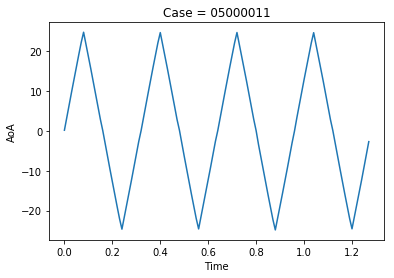

In [7]:
naca0015_0500.AoA.sel(Case='05000011').plot()
plt.show()

In [8]:
naca0015_0500.AoA.sel(Case='05000011')

<xarray.DataArray 'AoA' (Time: 128)>
array([  1.534000e-01,   3.394000e+00,   6.591000e+00,   9.770000e+00,
         1.292000e+01,   1.603000e+01,   1.912000e+01,   2.213000e+01,
         2.472000e+01,   2.170000e+01,   1.865000e+01,   1.558000e+01,
         1.244000e+01,   9.287000e+00,   6.089000e+00,   2.890000e+00,
         5.566000e-02,  -3.219000e+00,  -6.438000e+00,  -9.623000e+00,
        -1.278000e+01,  -1.591000e+01,  -1.901000e+01,  -2.204000e+01,
        -2.466000e+01,  -2.159000e+01,  -1.853000e+01,  -1.542000e+01,
        -1.230000e+01,  -9.156000e+00,  -5.918000e+00,  -2.714000e+00,
         5.566000e-02,   3.313000e+00,   6.527000e+00,   9.689000e+00,
         1.286000e+01,   1.597000e+01,   1.904000e+01,   2.205000e+01,
         2.463000e+01,   2.161000e+01,   1.859000e+01,   1.551000e+01,
         1.239000e+01,   9.239000e+00,   6.025000e+00,   2.825000e+00,
         1.371000e-01,  -3.187000e+00,  -6.405000e+00,  -9.591000e+00,
        -1.277000e+01,  -1.590000e+01,  

Two variables in a single case plotted against eachother.

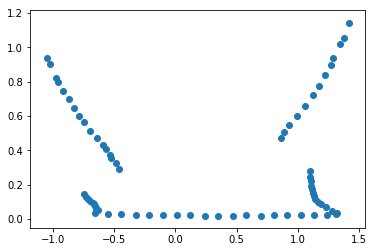

In [9]:
single_case=du00w212_forces.sel(Case='104_laminar_cl_500k-Balance')
plt.scatter(single_case.Cl,single_case.Cd)
plt.show()


Loop through all the cases in the file

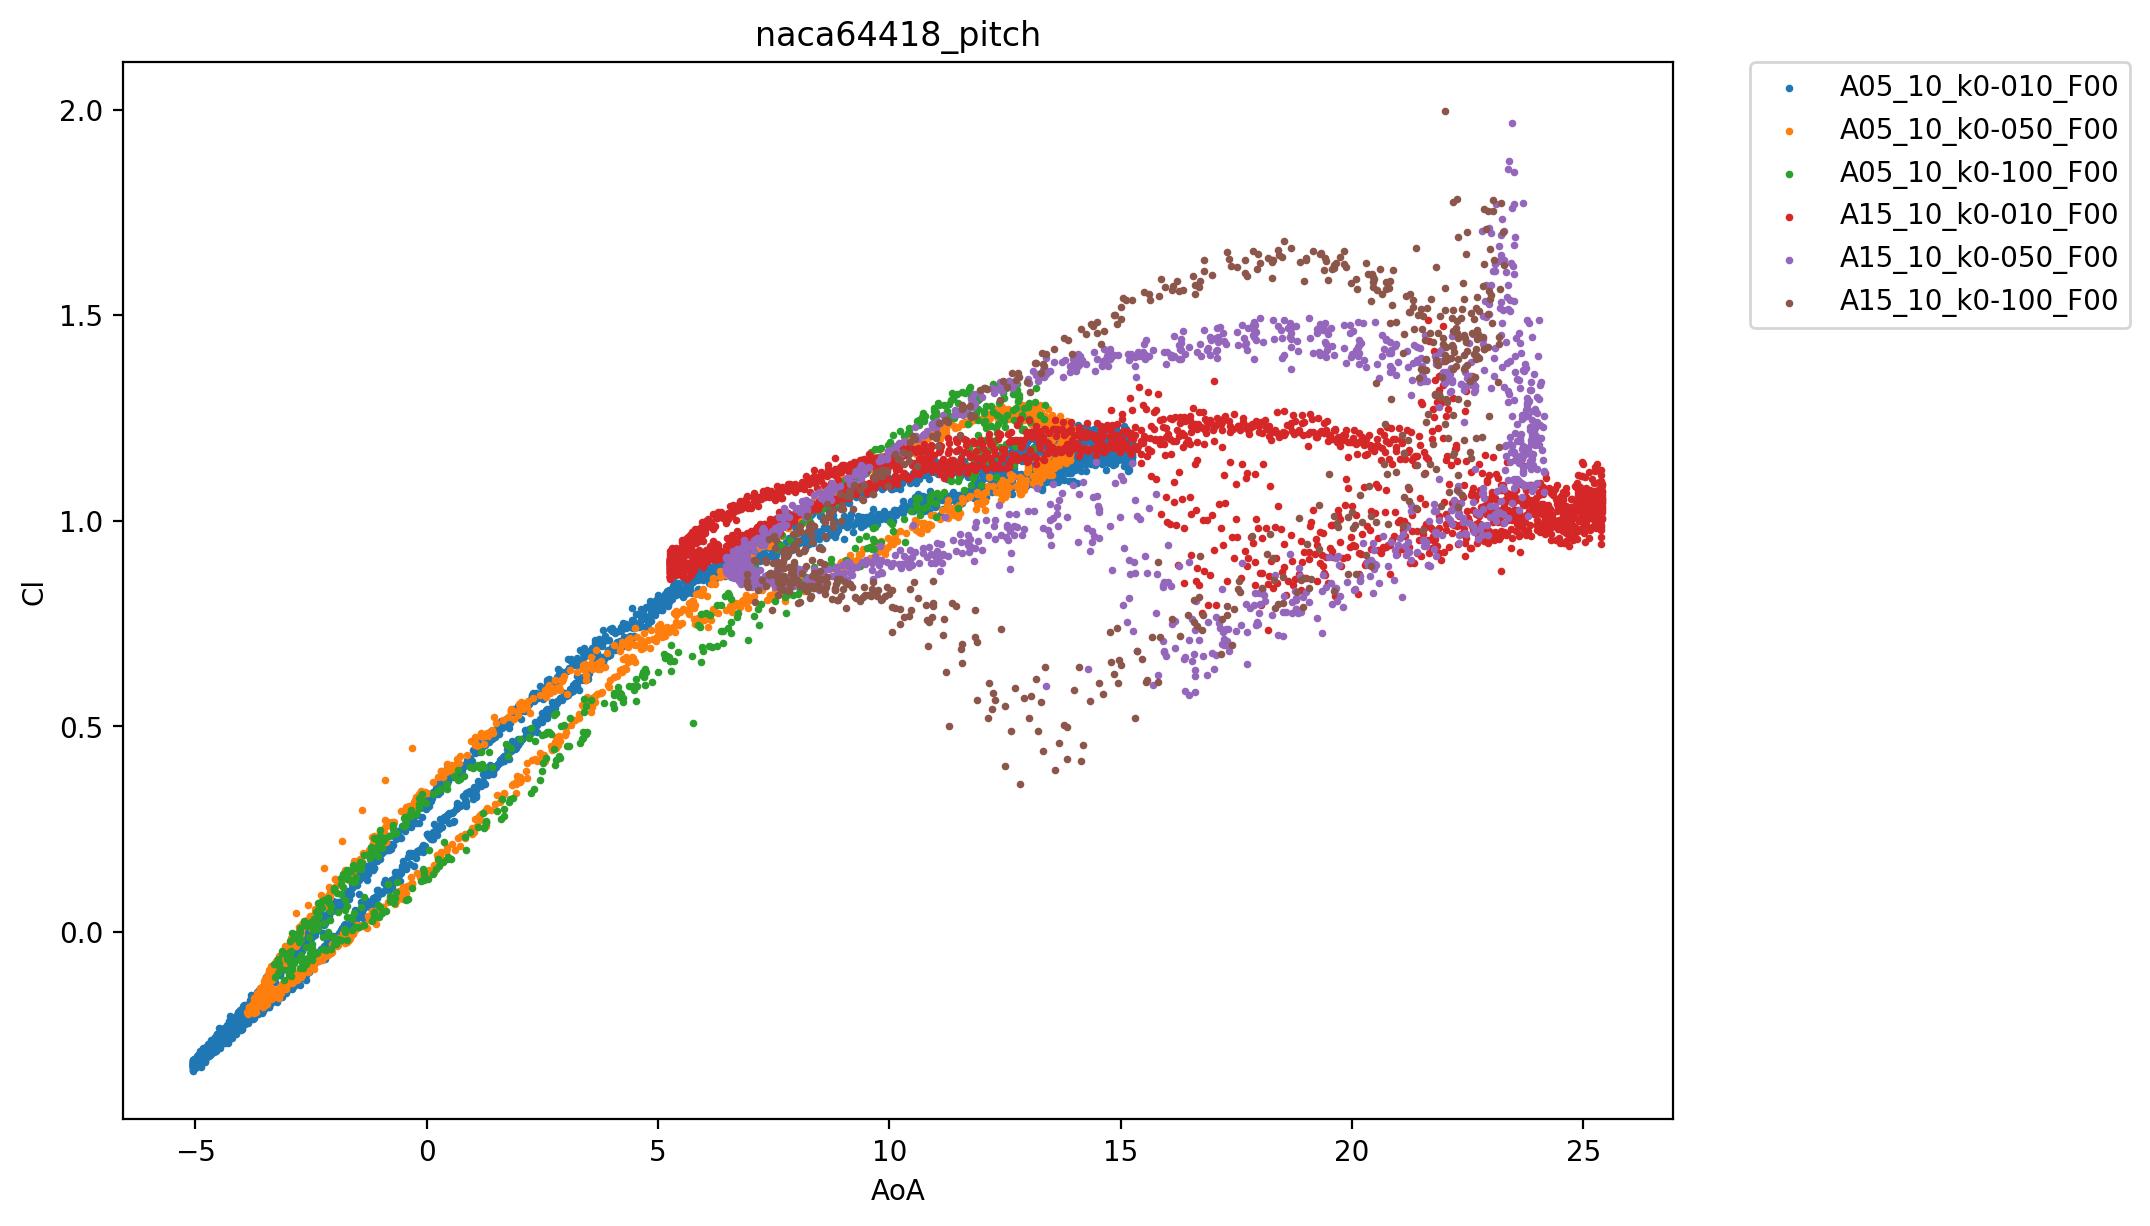

In [10]:
#figure size in inches, 
#and dpi resolution (useful in high-res screens or for printing)
plt.figure(figsize=(10,7),dpi=200) 

plt.title('naca64418_pitch')
plt.xlabel('AoA')
plt.ylabel('Cl')

for case in naca64418_pitch.Case.to_series():
    single_case=naca64418_pitch.sel(Case=case)
    plt.scatter(single_case.AoA,single_case.Cl, s=3, label=case)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Working with more files at once, with some additional formatting of the plots (`c` = value for colour map, `vmin`, `vmax` = colourmap range, `s` = marker size, `marker` = marker type, `alpha` = transparency).

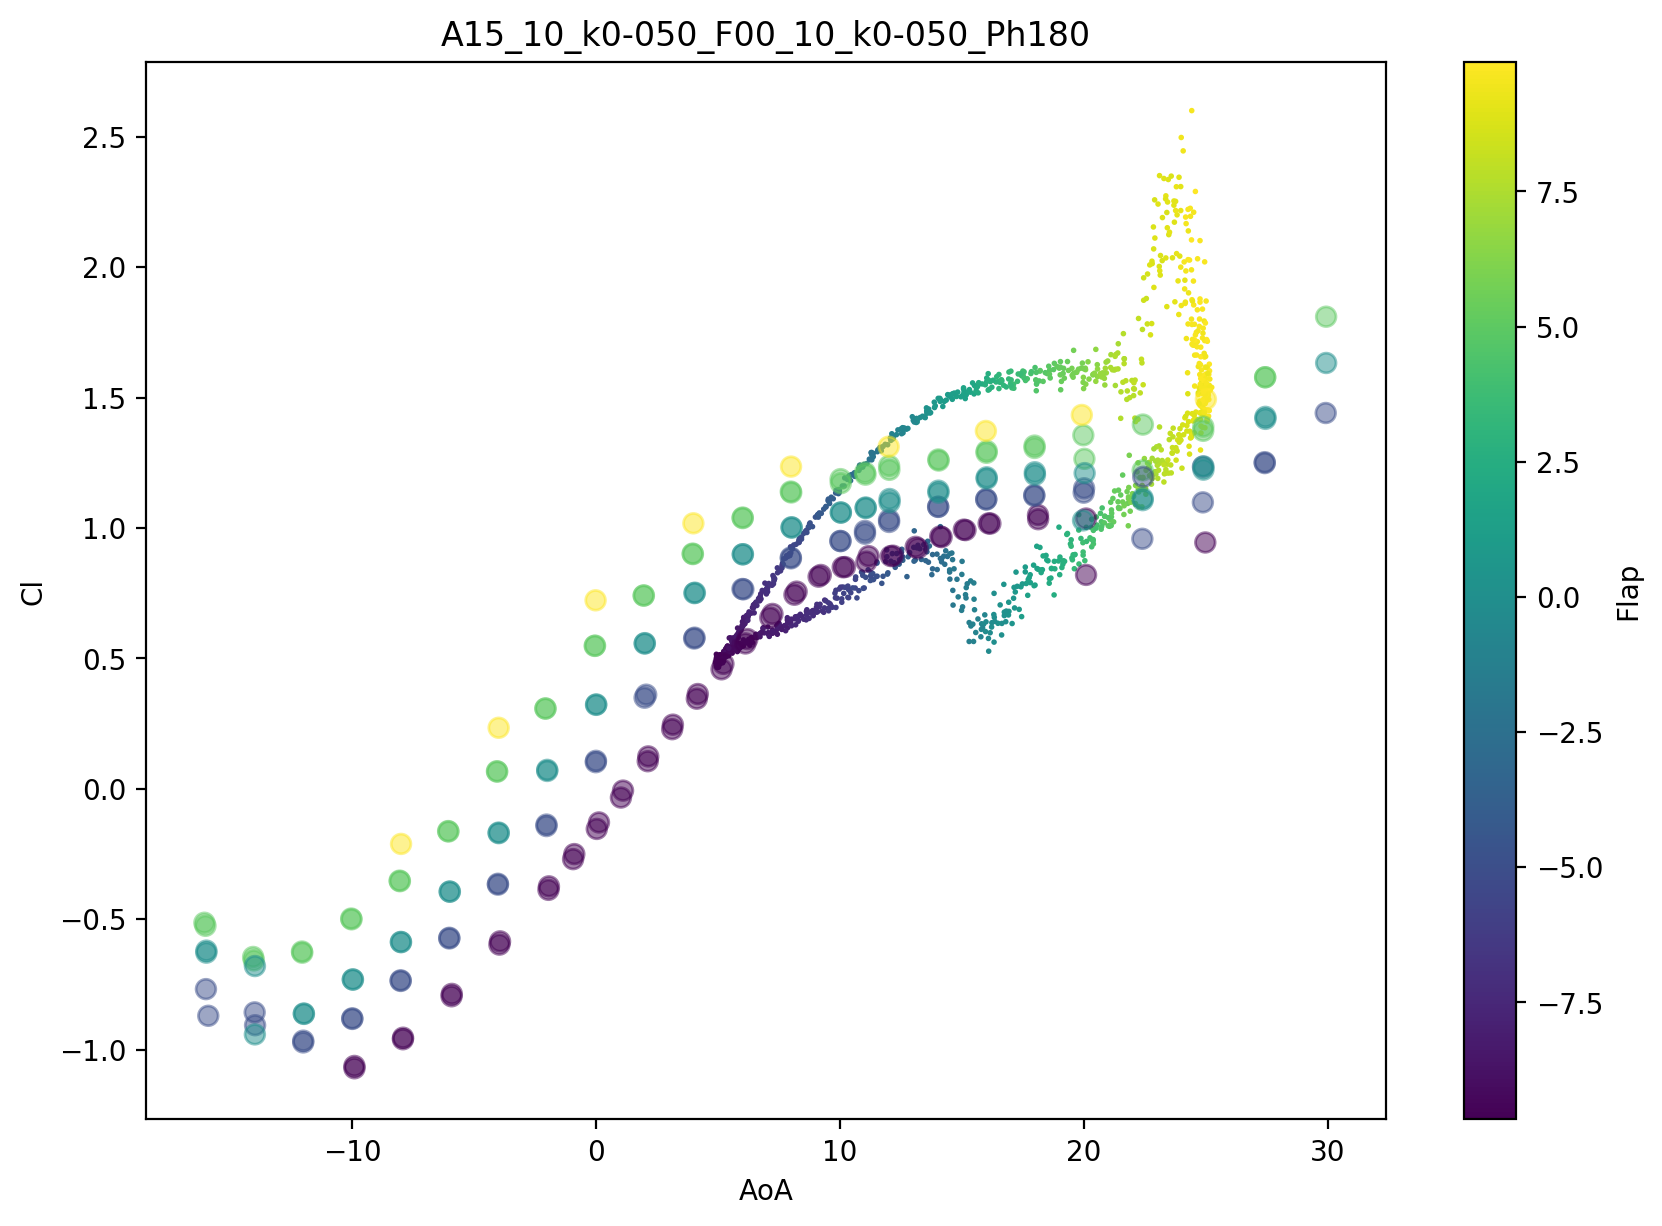

In [11]:
plt.figure(figsize=(10,7), dpi = 200) 

plt.title('A15_10_k0-050_F00_10_k0-050_Ph180')
plt.xlabel('AoA')
plt.ylabel('Cl')

single_case=naca64418_combined.sel(Case='A15_10_k0-050_F00_10_k0-050_Ph180')

_min, _max = np.amin(single_case.Flap), np.amax(single_case.Flap)
plt.scatter(single_case.AoA,single_case.Cl, c = single_case.Flap, vmin = _min, vmax = _max, s=1)
plt.colorbar(label='Flap')

single_case=naca64418_steady.sel(Case='F05')
c = np.ones_like(single_case.AoA) * 5
plt.scatter(single_case.AoA,single_case.Cl, c=c, vmin = _min, vmax = _max, marker='o', s=50, alpha=.5)

single_case=naca64418_steady.sel(Case='F10')
c = np.ones_like(single_case.AoA) * 10
plt.scatter(single_case.AoA,single_case.Cl, c=c, vmin = _min, vmax = _max, marker='o', s=50, alpha=.5)

single_case=naca64418_steady.sel(Case='Fm10')
c = np.ones_like(single_case.AoA) * -10
plt.scatter(single_case.AoA,single_case.Cl, c=c, vmin = _min, vmax = _max, marker='o', s=50, alpha=.5)

single_case=naca64418_steady.sel(Case='Fm05')
c = np.ones_like(single_case.AoA) * -5
plt.scatter(single_case.AoA,single_case.Cl, c=c, vmin = _min, vmax = _max, marker='o', s=50, alpha=.5)

single_case=naca64418_steady.sel(Case='F00')
c = np.ones_like(single_case.AoA) * 0
plt.scatter(single_case.AoA,single_case.Cl, c=c, vmin = _min, vmax = _max, marker='o', s=50, alpha=.5)

plt.show()